# **Initialization**

**Importing libraries**

In [500]:
import io

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import missingno as msno
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.backends.backend_pdf import PdfPages

from google.colab import files

**Adding input CSV files**

In [ ]:
uploaded = files.upload()

**Reading uploaded CSVs and initializing dataframes**

In [501]:
df_emosounds = pd.read_csv(io.BytesIO(uploaded['EmoSounds.csv']))
df_emosounds_init = df_emosounds.iloc[:, :5]
df_emosounds = df_emosounds.iloc[:, 5:]

df_iadsed = pd.read_csv(io.BytesIO(uploaded['IADSED.csv']))
df_iadsed_init = df_iadsed.iloc[:, :5]
df_iadsed = df_iadsed.iloc[:, 5:]

# **Checking for duplicates**

In [502]:
duplicate_check = df_emosounds[df_emosounds.duplicated()]
duplicate_check

duplicate_check = df_iadsed[df_iadsed.duplicated()]
duplicate_check

,arousal,valence,dominance,dynamics_rms_mean,dynamics_rms_std,rhythm_attacktime_mean,rhythm_tempo_mean,rhythm_tempo_std,rhythm_pulseclarity_mean,rhythm_eventdensity_mean,...,timbre_lowenergy_std,timbre_spectralflux_mean,timbre_spectralflux_std,pitch_pitch_mean,tonal_keyclarity_mean,tonal_keyclarity_std,tonal_mode_mean,tonal_mode_std,tonal_hcdf_mean,tonal_hcdf_std


# **Missing Values**

**Printing the Data Dense Display before filling in the values**

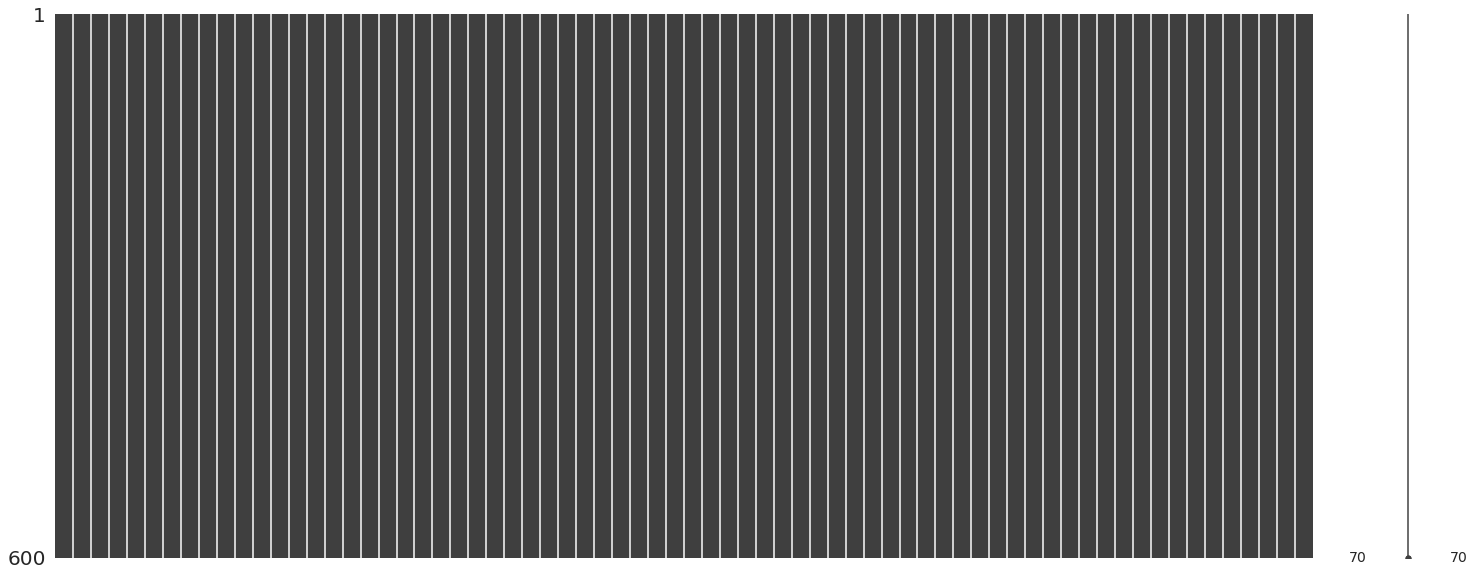

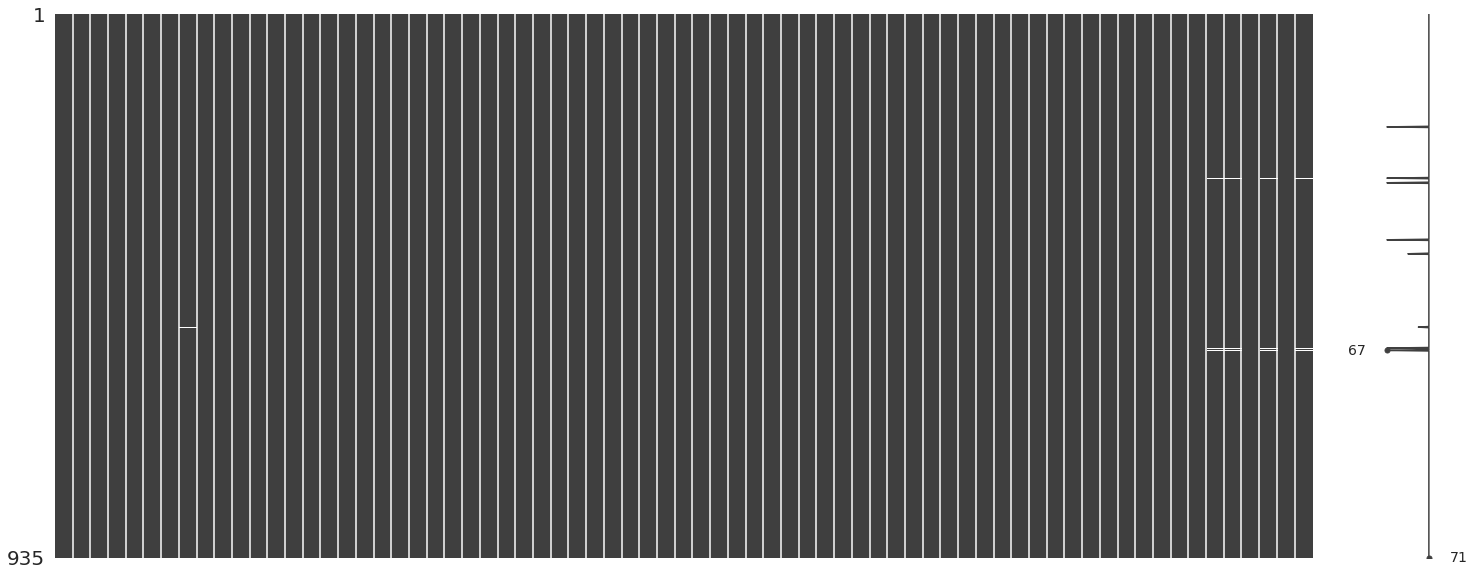

In [503]:
msno.matrix(df_emosounds)
msno.matrix(df_iadsed)

**Checking percentage of missing values in each columns**  
If any value is greater than 60% then remove the feature.  
Since, the percentage of missing values are less than 0.7% there was no need to eliminate any features.

In [504]:
# Referred from - https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset

percent_missing = df_emosounds.isnull().sum() * 100 / len(df_emosounds)
missing_value_df = pd.DataFrame({'column_name': df_emosounds.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
print("The missing values in emosounds")
missing_value_df

percent_missing = df_iadsed.isnull().sum() * 100 / len(df_iadsed)
missing_value_df = pd.DataFrame({'column_name': df_iadsed.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
print("The missing values in iadsed")
missing_value_df

The missing values in emosounds
The missing values in iadsed


,column_name,percent_missing
tonal_hcdf_std,tonal_hcdf_std,0.641711
tonal_mode_std,tonal_mode_std,0.641711
tonal_keyclarity_std,tonal_keyclarity_std,0.641711
tonal_keyclarity_mean,tonal_keyclarity_mean,0.641711
rhythm_tempo_std,rhythm_tempo_std,0.213904
...,...,...
spectral_roughness_mean,spectral_roughness_mean,0.000000
spectral_irregularity_mean,spectral_irregularity_mean,0.000000
spectral_inharmonicity_mean,spectral_inharmonicity_mean,0.000000
spectral_mfcc_mean_1,spectral_mfcc_mean_1,0.000000


**Replacing the empty values with median of that columns for instances(rows) that contain at least one null value**

In [505]:
# Referred from - https://www.statology.org/pandas-fillna-with-median/

df_emosounds_nan_cols = list(df_emosounds.loc[:, df_emosounds.isna().any()])
print(df_emosounds_nan_cols)
if df_emosounds_nan_cols:
  for cols in df_emosounds_nan_cols:
    df_emosounds[cols].fillna(df_emosounds[cols].median().round(1), inplace=True)

df_iadsed_nan_cols = list(df_iadsed.loc[:, df_iadsed.isna().any()])
print(df_iadsed_nan_cols)
if df_iadsed_nan_cols:
  for cols in df_iadsed_nan_cols:
    df_iadsed[cols].fillna(df_iadsed[cols].median().round(1), inplace=True)

[]
['rhythm_tempo_mean', 'rhythm_tempo_std', 'tonal_keyclarity_mean', 'tonal_keyclarity_std', 'tonal_mode_std', 'tonal_hcdf_std']


**Printing the Data Dense Display after filling in the null values**

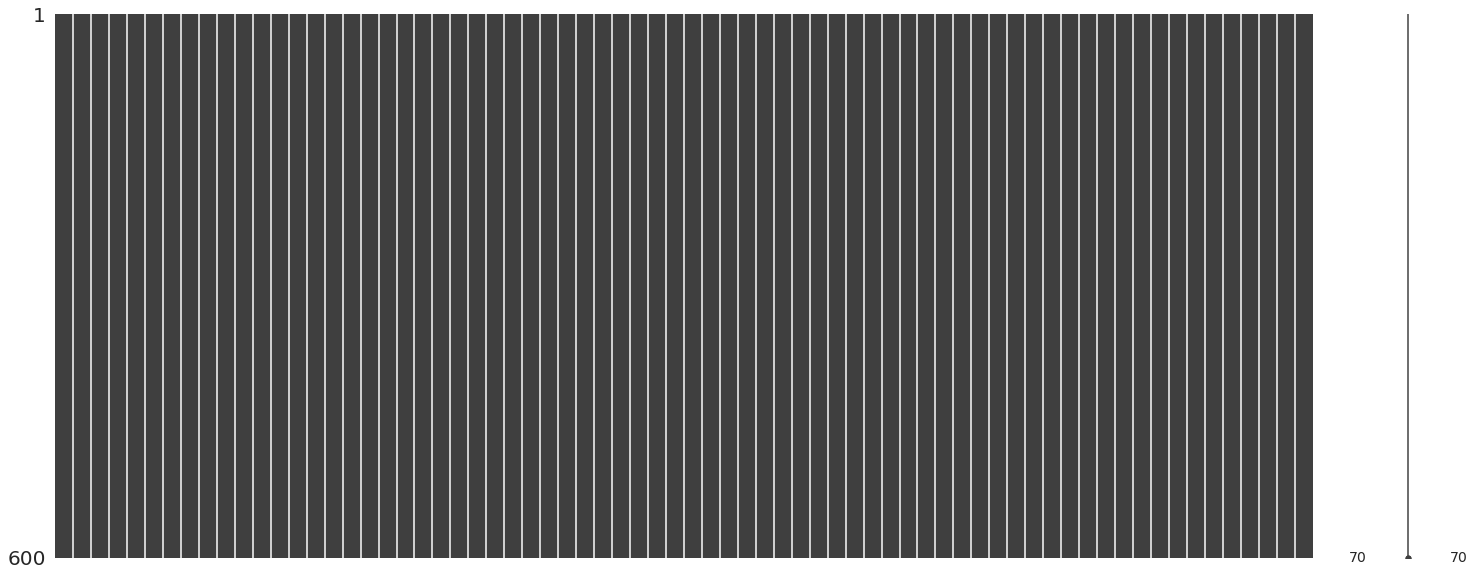

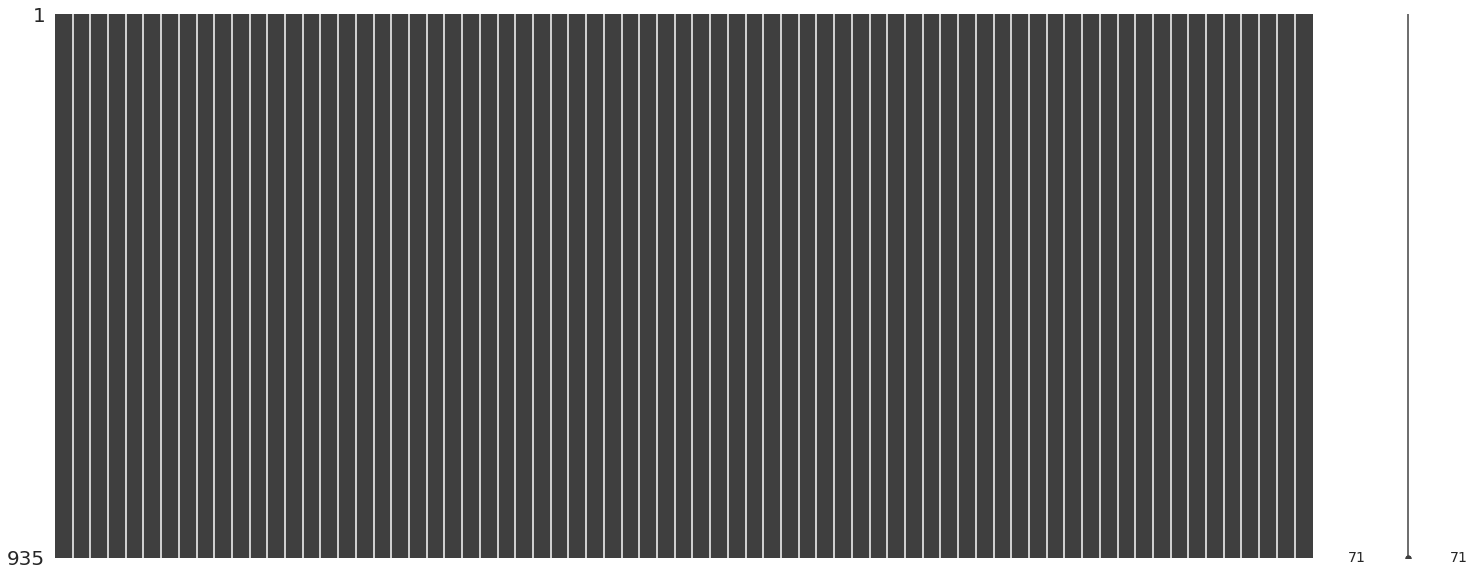

In [506]:
msno.matrix(df_emosounds)
msno.matrix(df_iadsed)

# **Outlier Handling**

**Displaying box plots for EmoSounds dataframe**

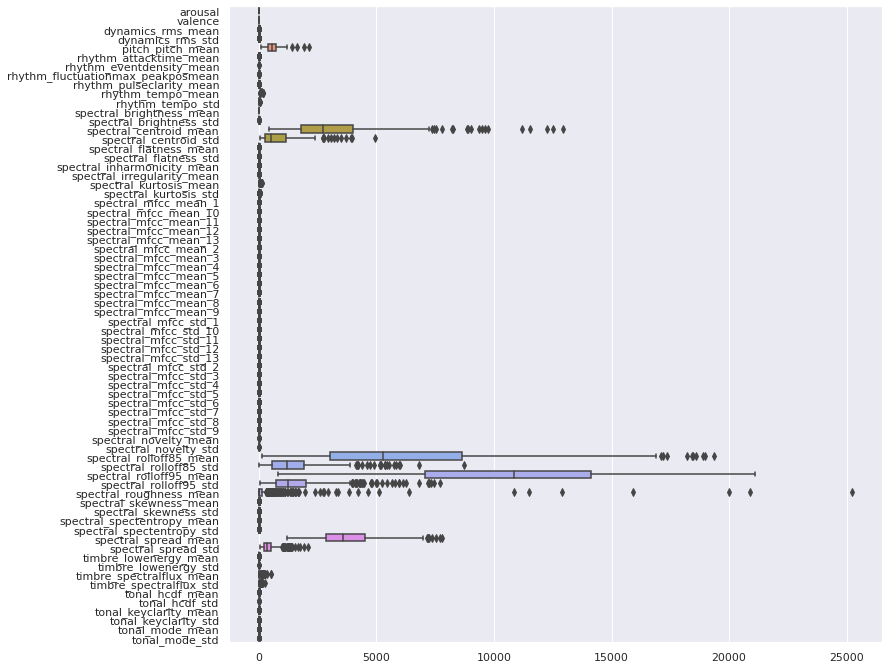

In [507]:
ax = sns.boxplot(data=df_emosounds, orient="h")

**Displaying boxplots of IADSED dataframe**

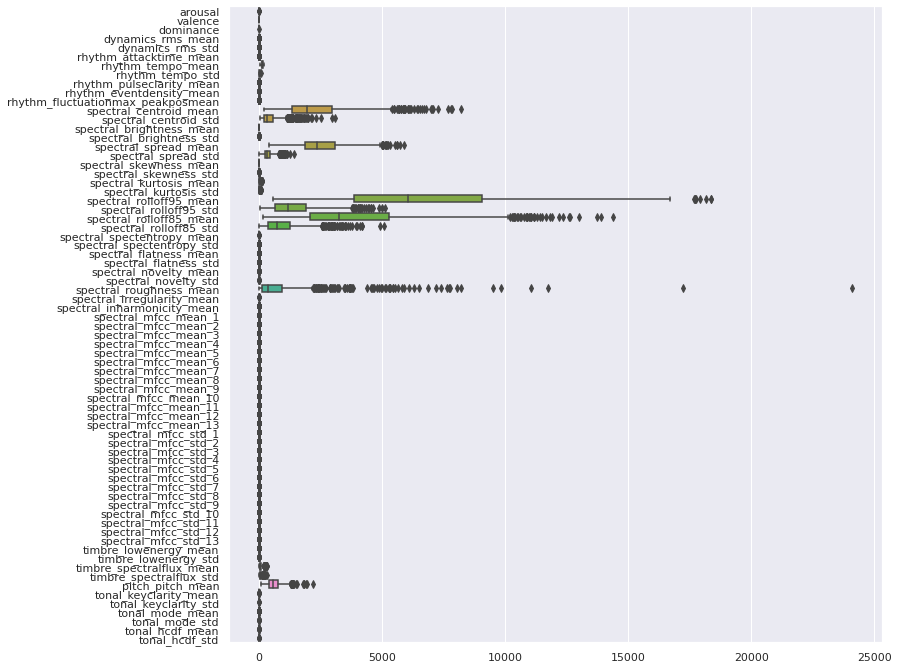

In [508]:
ax = sns.boxplot(data=df_iadsed, orient="h")

**Calculating means and sorting them for all the columns in dataframe EmoSounds and IADSED**

In [543]:
df_emosounds_mean = df_emosounds.describe().iloc[1]
df_emosounds_mean = df_emosounds_mean.sort_values()
df_emosounds_mean

df_emosounds_mean = pd.DataFrame({'column': df_emosounds_mean.index, 'value': df_emosounds_mean.values})


In [544]:
df_iadsed_mean = df_iadsed.describe().iloc[1]
df_iadsed_mean = df_iadsed_mean.sort_values()
df_iadsed_mean

df_iadsed_mean = pd.DataFrame({'column': df_iadsed_mean.index, 'value': df_iadsed_mean.values})

### **Operations on EmoSounds dataframe**

**Sample boxplot for checking outliers**

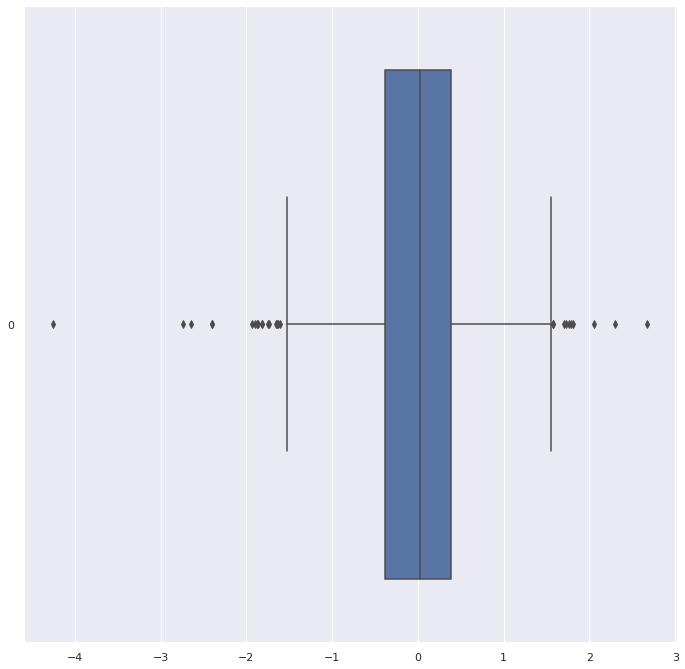

In [513]:
df_emosounds_trial = df_emosounds['spectral_mfcc_mean_2']

sns.boxplot(data=df_emosounds_trial, orient = "h")

**Removing outliers and displaying sample boxplot**  
We check the zscore for each data point. If, the zscore is greater than 3, we consider it as an outlier and remove it.

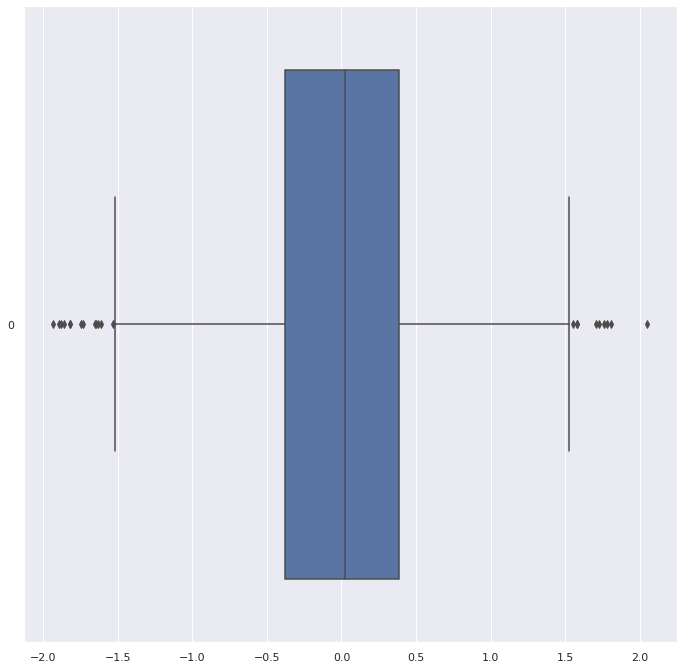

In [514]:
# Referred from - https://stackoverflow.com/questions/49392387/python-pandas-remove-rows-with-outlying-values-keeping-all-columns

df_emosounds_trial = df_emosounds_trial[(np.abs(stats.zscore(df_emosounds_trial)) < 3)]

sns.boxplot(data=df_emosounds_trial, orient = "h")

**Plotting all box plots before removing outliers and saving it to folder - "emosounds_before**

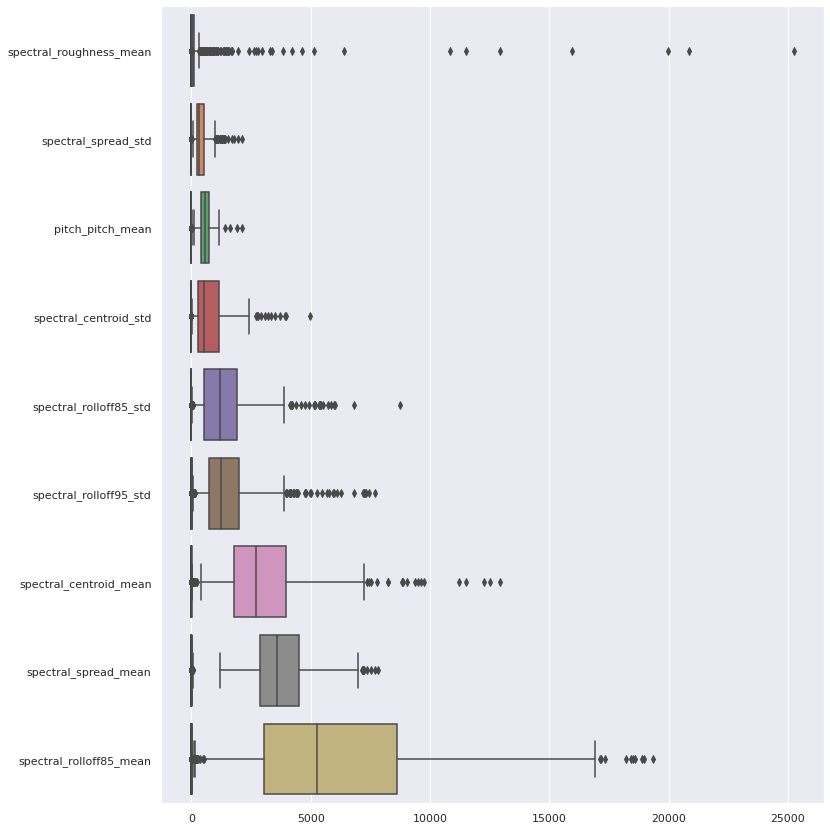

In [515]:
for i in range(0, len(df_emosounds_mean), 10):
  sns.boxplot(data=df_emosounds[df_emosounds_mean['column'][i:i+9]], orient = "h").figure
  plt.tight_layout()
  plt.savefig(f'emosounds_before/emosounds_{i}.png')

**Removing outliers**

In [516]:
df_emosounds = df_emosounds[(np.abs(stats.zscore(df_emosounds)) < 3).all(axis=1)]

**Plotting all boxplots after removing outliers and saving it to folder - "emosounds_after**

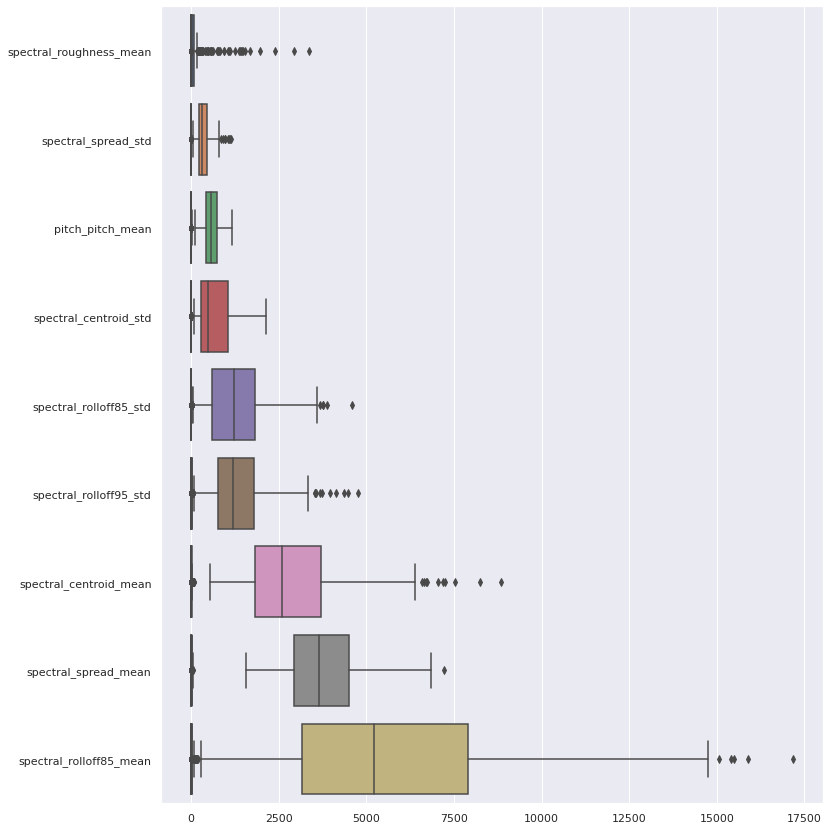

In [517]:
for i in range(0, len(df_emosounds_mean), 10):
  sns.boxplot(data=df_emosounds[df_emosounds_mean['column'][i:i+9]], orient = "h").figure
  plt.tight_layout()
  plt.savefig(f'emosounds_after/emosounds_{i}.png')

### **Operations on IADSED dataframe**

**Sample boxplot for checking outliers**

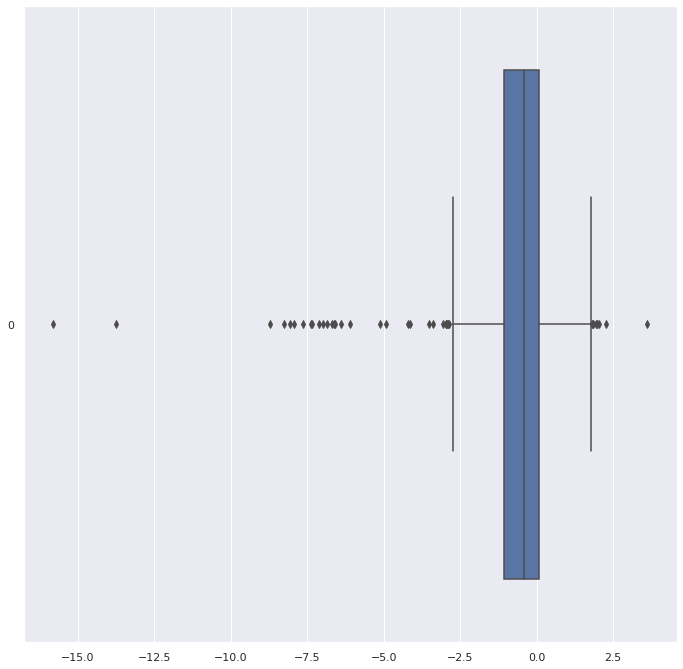

In [518]:
df_iadsed_trial = df_iadsed['spectral_mfcc_mean_2']

sns.boxplot(data=df_iadsed_trial, orient = "h")

**Removing outliers and displaying sample boxplot**  
We check the zscore for each data point. If, the zscore is greater than 3, we consider it as an outlier and remove it.

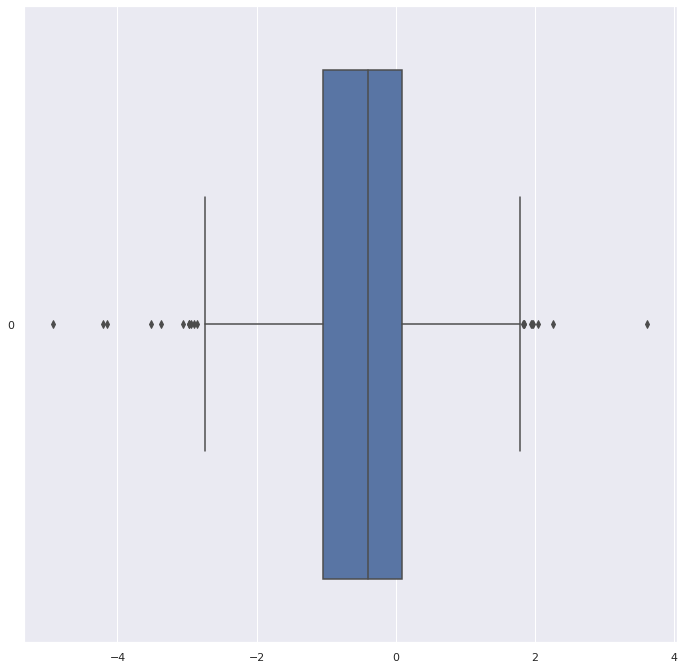

In [519]:
df_iadsed_trial = df_iadsed_trial[(np.abs(stats.zscore(df_iadsed_trial)) < 3)]

sns.boxplot(data=df_iadsed_trial, orient = "h")

**Plotting all box plots before removing outliers and saving it to folder - "iadsed_before"**

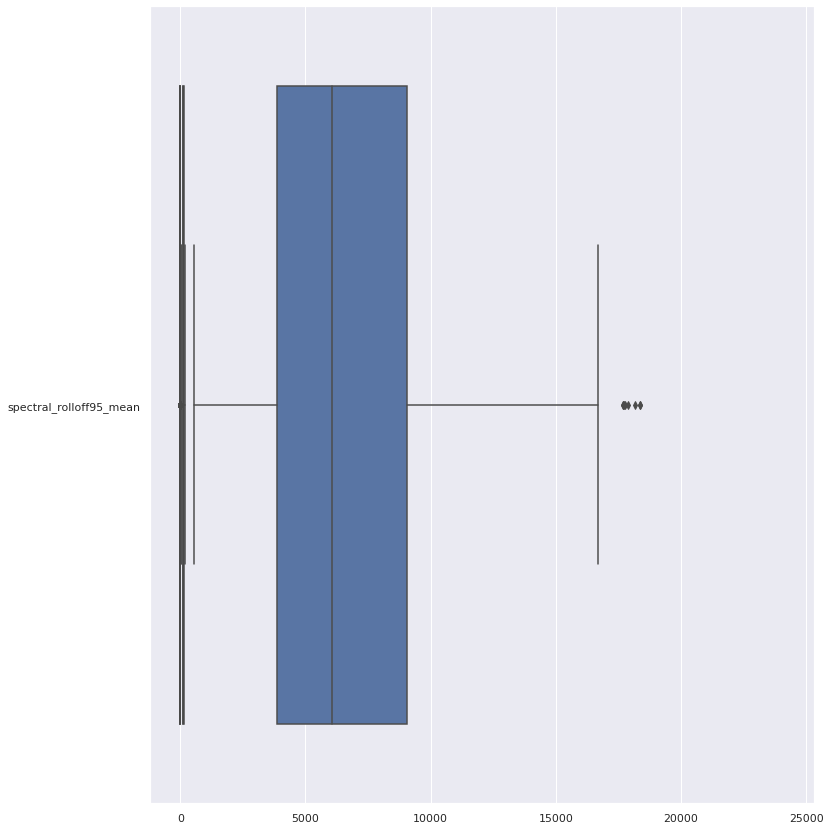

In [520]:
for i in range(0, len(df_iadsed_mean), 10):
  sns.boxplot(data=df_iadsed[df_iadsed_mean['column'][i:i+9]], orient = "h").figure
  plt.tight_layout()
  plt.savefig(f'iadsed_before/iadsed_{i}.png')

**Removing outliers**

In [521]:
df_iadsed = df_iadsed[(np.abs(stats.zscore(df_iadsed)) < 3).all(axis=1)]

**Plotting all boxplots after removing outliers and saving it to folder - "iadsed_after**

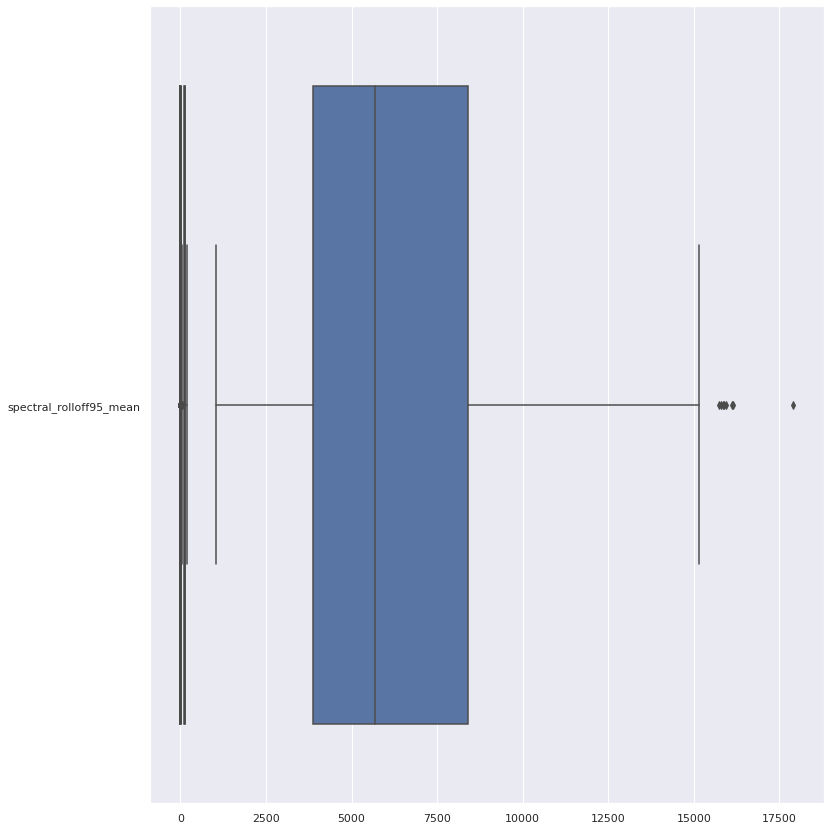

In [522]:
for i in range(0, len(df_iadsed_mean), 10):
  sns.boxplot(data=df_iadsed[df_iadsed_mean['column'][i:i+9]], orient = "h").figure
  plt.tight_layout()
  plt.savefig(f'iadsed_after/iadsed_{i}.png')

# **Normalization**

### **Operations on EmoSounds dataframe**

**Displaying variance of all columns before normalization**  
Initializing the target classes in variable "df_emosounds_output" and input features in variable "df_emosounds_input".

In [524]:
df_emosounds_input = df_emosounds.iloc[:, 2:]
df_emosounds_output = df_emosounds.iloc[:, :2]
print(df_emosounds_input.var().sort_values())
emosounds_cols = list(df_emosounds_input.columns)

dynamics_rms_std             1.533087e-04
tonal_mode_std               2.464838e-04
tonal_mode_mean              3.799262e-04
spectral_spectentropy_std    3.825921e-04
spectral_flatness_std        4.237196e-04
                                 ...     
spectral_rolloff85_std       6.470013e+05
spectral_spread_mean         1.212168e+06
spectral_centroid_mean       2.239427e+06
spectral_rolloff85_mean      1.227615e+07
spectral_rolloff95_mean      1.759709e+07
Length: 68, dtype: float64


**Displaying Normal Distribution for a feature with lowest variance before normalization**

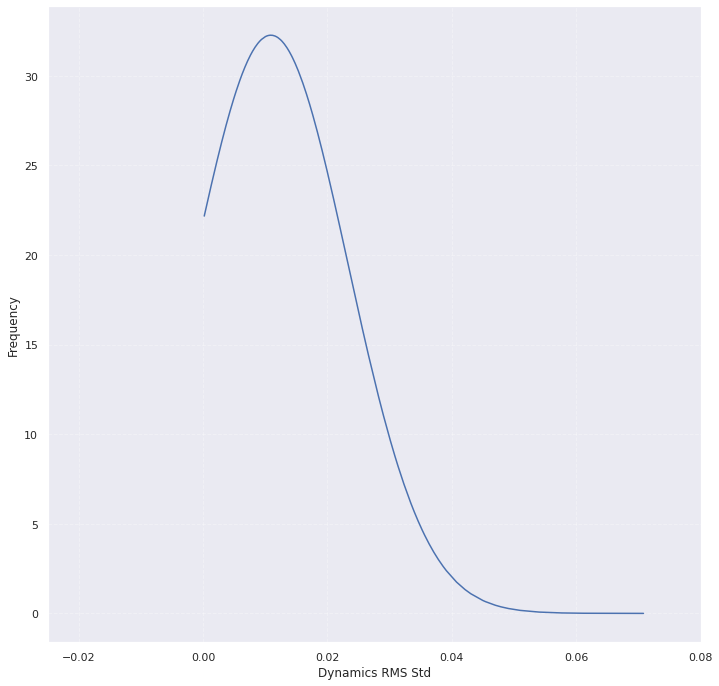

In [525]:
df_mean = np.mean(df_emosounds_input["dynamics_rms_std"])
df_std = np.std(df_emosounds_input["dynamics_rms_std"])

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df_emosounds_input["dynamics_rms_std"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df_emosounds_input["dynamics_rms_std"].sort_values(), pdf)
plt.xlim([-0.025, 0.08])  
plt.xlabel("Dynamics RMS Std", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

**Displaying Normal Distribution for a feature with highest variance before normalization**

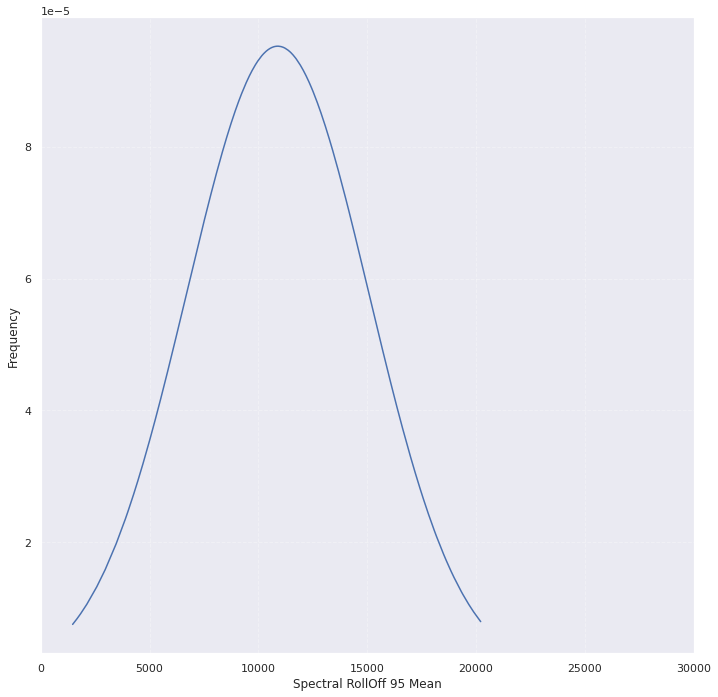

In [547]:
df_mean = np.mean(df_emosounds_input["spectral_rolloff95_mean"])
df_std = np.std(df_emosounds_input["spectral_rolloff95_mean"])

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df_emosounds_input["spectral_rolloff95_mean"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df_emosounds_input["spectral_rolloff95_mean"].sort_values(), pdf)
plt.xlim([0,30000])  
plt.xlabel("Spectral RollOff 95 Mean", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

**Normalization of all features except for target classes**  
Z-Normalization gives us zero mean and unit variance.

In [528]:
# Referred from - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

x = df_emosounds_input.values #returns a numpy array
norm = preprocessing.StandardScaler()
scaled = norm.fit_transform(x)
df_emosounds_normalized = pd.DataFrame(data=scaled, columns = emosounds_cols)
df_emosounds_normalized.var()

dynamics_rms_mean           1.002463
dynamics_rms_std            1.002463
pitch_pitch_mean            1.002463
rhythm_attacktime_mean      1.002463
rhythm_eventdensity_mean    1.002463
                              ...   
tonal_hcdf_std              1.002463
tonal_keyclarity_mean       1.002463
tonal_keyclarity_std        1.002463
tonal_mode_mean             1.002463
tonal_mode_std              1.002463
Length: 68, dtype: float64

**Displaying Normal Distribution for a feature with lowest variance after normalization**

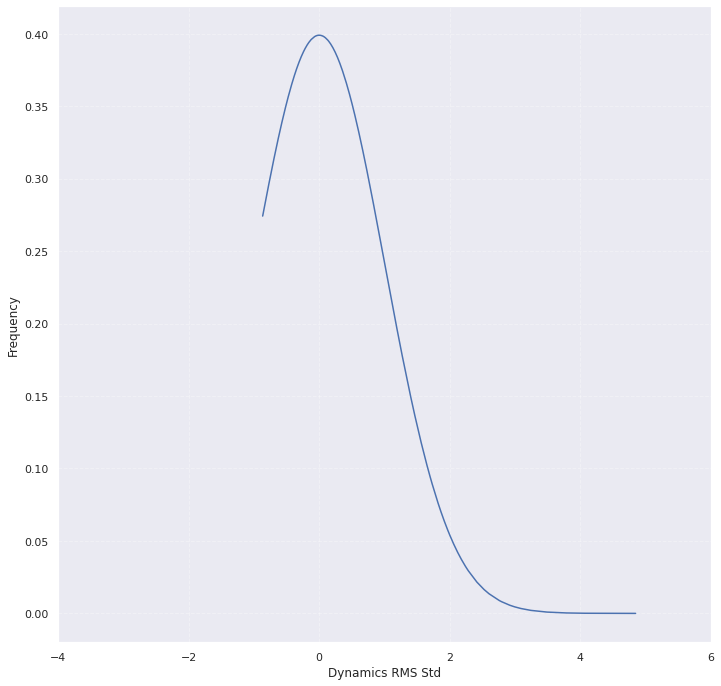

In [529]:
df_mean = np.mean(df_emosounds_normalized["dynamics_rms_std"])
df_std = np.std(df_emosounds_normalized["dynamics_rms_std"])

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df_emosounds_normalized["dynamics_rms_std"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df_emosounds_normalized["dynamics_rms_std"].sort_values(), pdf)
plt.xlim([-4, 6])  
plt.xlabel("Dynamics RMS Std", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

**Displaying Normal Distribution for a feature with highest variance after normalization**

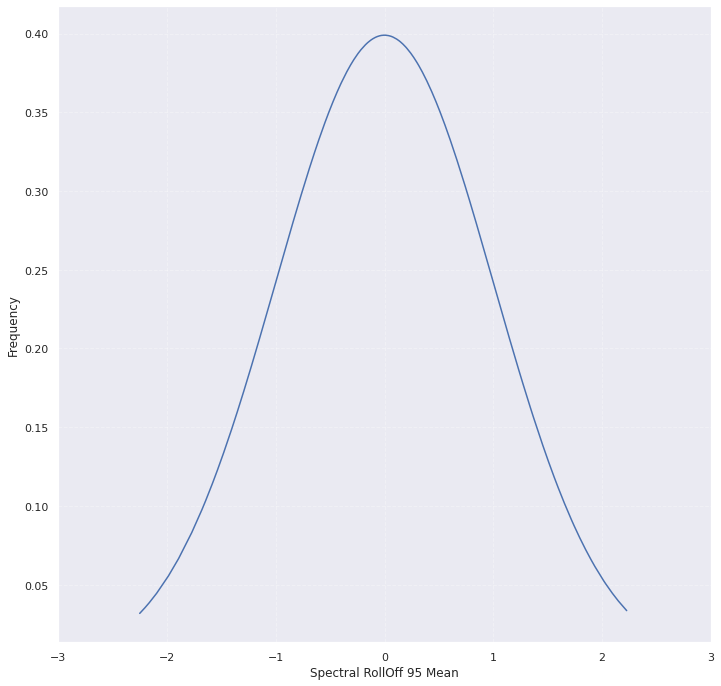

In [545]:
df_mean = np.mean(df_emosounds_normalized["spectral_rolloff95_mean"])
df_std = np.std(df_emosounds_normalized["spectral_rolloff95_mean"])

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df_emosounds_normalized["spectral_rolloff95_mean"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df_emosounds_normalized["spectral_rolloff95_mean"].sort_values(), pdf)
plt.xlim([-3, 3])  
plt.xlabel("Spectral RollOff 95 Mean", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

**Merging columns for getting final dataframe**

In [531]:
df_emosounds_whole = pd.concat([df_emosounds_init, df_emosounds_output], axis=1)
df_emosounds_whole = df_emosounds_whole.dropna()

df_emosounds_final = pd.concat([df_emosounds_output.reset_index().iloc[:, 1:], df_emosounds_normalized], axis=1)
df_emosounds_final

,arousal,valence,dynamics_rms_mean,dynamics_rms_std,pitch_pitch_mean,rhythm_attacktime_mean,rhythm_eventdensity_mean,rhythm_fluctuationmax_peakposmean,rhythm_pulseclarity_mean,rhythm_tempo_mean,...,timbre_lowenergy_mean,timbre_lowenergy_std,timbre_spectralflux_mean,timbre_spectralflux_std,tonal_hcdf_mean,tonal_hcdf_std,tonal_keyclarity_mean,tonal_keyclarity_std,tonal_mode_mean,tonal_mode_std
0,-0.518549,0.302556,-0.494271,-0.403161,-0.977025,-0.434694,-1.268013,-0.090179,-0.472290,-0.773896,...,1.030285,1.081568,-0.513828,-0.380621,-0.471950,1.313054,-0.250551,1.381328,-0.750754,-1.649600
1,0.475680,0.193735,0.568754,1.401139,0.817897,-0.277202,0.041456,0.744980,3.726916,1.974167,...,-0.243940,0.822488,0.700124,1.473877,0.634417,0.301171,-0.124363,-0.145724,-0.138818,0.098431
2,0.901072,0.429514,1.504465,0.765231,0.277348,-0.473814,0.128754,-1.048114,-0.757017,0.630491,...,-0.431995,0.009935,1.465872,0.434563,-1.059693,-0.800664,1.734394,0.600412,-2.961078,1.036475
3,-0.815334,0.549876,-0.723781,-0.717395,-0.841774,-0.213336,-1.442609,-0.451143,0.033410,0.663708,...,3.022333,1.472161,-0.749333,-0.688574,-1.038682,0.750199,0.479261,0.102820,-1.609200,-2.076627
4,-0.124485,-0.249794,0.260277,0.501051,-0.471350,-0.463675,0.477946,0.028840,1.446864,0.086175,...,-0.403242,-0.049981,0.433077,0.960261,0.923015,0.037027,0.466682,-0.063524,-0.895455,0.785590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,-0.826876,0.647156,-0.832452,-0.856318,0.996309,0.082068,-0.569629,-1.113206,-0.913984,-0.910240,...,1.282061,1.178913,-0.833294,-0.797222,2.957514,2.757523,-0.172466,1.092171,0.298880,-0.350152
403,-0.073372,0.957131,-0.439476,-0.605642,0.306403,-0.521792,1.874713,0.772947,-0.671567,0.671256,...,0.361780,-0.490802,-0.417783,-0.519083,0.563222,-0.083049,-1.110169,-0.566732,0.130293,-0.581649
404,-0.203627,-0.251443,-0.183743,0.316764,-0.392912,-0.438889,-0.744225,-0.007924,-0.190459,-2.135307,...,-0.828157,-0.877013,-0.090180,0.344175,0.987526,0.088441,-0.468156,0.038371,-0.080620,0.754468
405,0.046991,-0.559769,0.013446,-0.034263,-1.129523,-0.525249,0.128754,-0.756411,0.499947,0.297824,...,0.083424,1.103452,0.016653,-0.139320,0.188693,-0.596587,-0.060481,0.009063,-0.642164,0.653132


### **Operations on IADSED dataframe**

**Displaying variance of all columns before normalization**  
Initializing the target classes in variable "df_iadsed_output" and input features in variable "df_iadsed_input".

In [532]:
df_iadsed_input = df_iadsed.iloc[:, 3:]
df_iadsed_output = df_iadsed.iloc[:, :3]
print(df_iadsed_input.var().sort_values())
emosounds_cols = list(df_iadsed_input.columns)

rhythm_attacktime_mean       3.993309e-04
spectral_spectentropy_std    4.317904e-04
spectral_flatness_std        4.843963e-04
tonal_mode_std               5.094646e-04
tonal_mode_mean              7.930436e-04
                                 ...     
spectral_rolloff95_std       6.648544e+05
spectral_roughness_mean      8.432366e+05
spectral_centroid_mean       1.280363e+06
spectral_rolloff85_mean      4.879499e+06
spectral_rolloff95_mean      1.177688e+07
Length: 68, dtype: float64


**Displaying Normal Distribution for a feature with lowest variance before normalization**

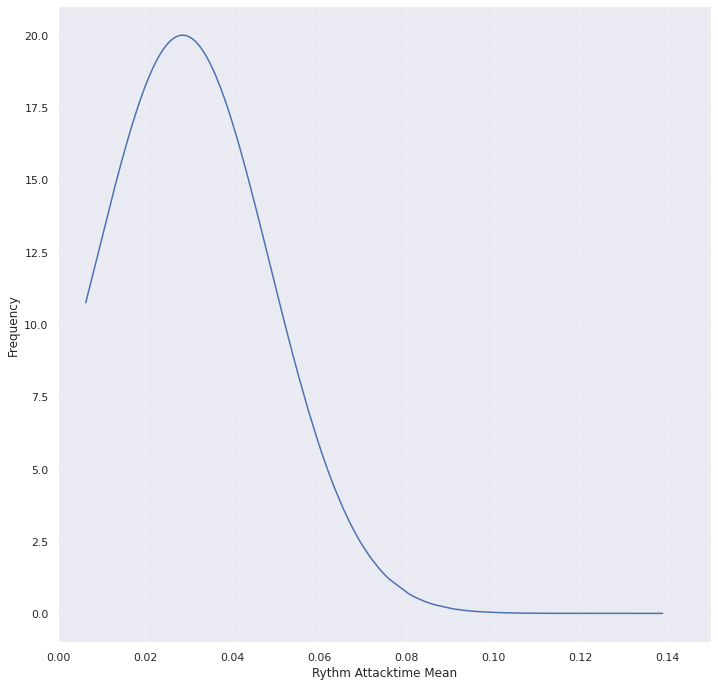

In [533]:
df_mean = np.mean(df_iadsed_input["rhythm_attacktime_mean"])
df_std = np.std(df_iadsed_input["rhythm_attacktime_mean"])

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df_iadsed_input["rhythm_attacktime_mean"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df_iadsed_input["rhythm_attacktime_mean"].sort_values(), pdf)
plt.xlim([0, 0.15])  
plt.xlabel("Rythm Attacktime Mean", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

**Displaying Normal Distribution for a feature with highest variance before normalization**

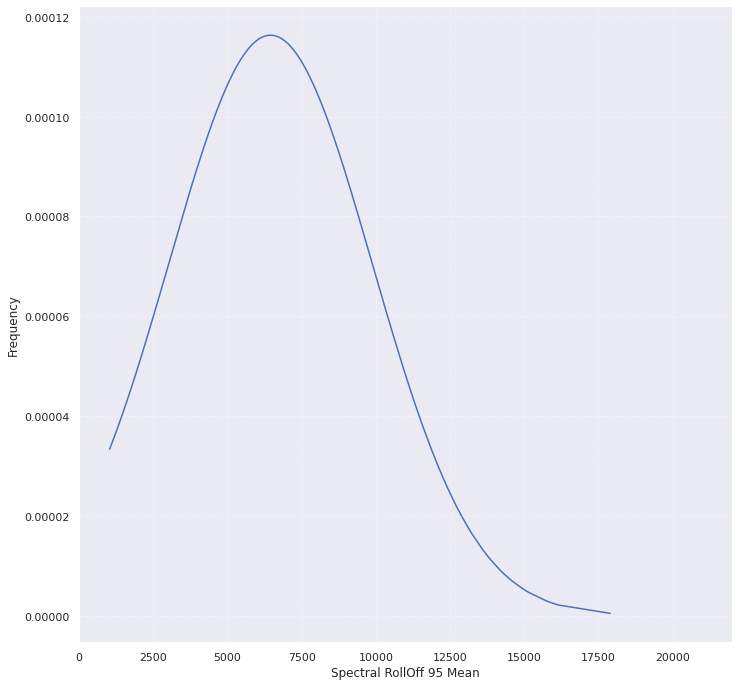

In [534]:
df_mean = np.mean(df_iadsed_input["spectral_rolloff95_mean"])
df_std = np.std(df_iadsed_input["spectral_rolloff95_mean"])

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df_iadsed_input["spectral_rolloff95_mean"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df_iadsed_input["spectral_rolloff95_mean"].sort_values(), pdf)
plt.xlim([0,22000])  
plt.xlabel("Spectral RollOff 95 Mean", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

**Normalization of all features except target classes**  
Z-Normalization gives us zero mean and unit variance.

In [535]:
x = df_iadsed_input.values #returns a numpy array
norm = preprocessing.StandardScaler()
scaled = norm.fit_transform(x)
df_iadsed_normalized = pd.DataFrame(data=scaled, columns = emosounds_cols)
df_iadsed_normalized.var()

dynamics_rms_mean         1.001575
dynamics_rms_std          1.001575
rhythm_attacktime_mean    1.001575
rhythm_tempo_mean         1.001575
rhythm_tempo_std          1.001575
                            ...   
tonal_keyclarity_std      1.001575
tonal_mode_mean           1.001575
tonal_mode_std            1.001575
tonal_hcdf_mean           1.001575
tonal_hcdf_std            1.001575
Length: 68, dtype: float64

**Displaying Normal Distribution for a feature with lowest variance after normalization**

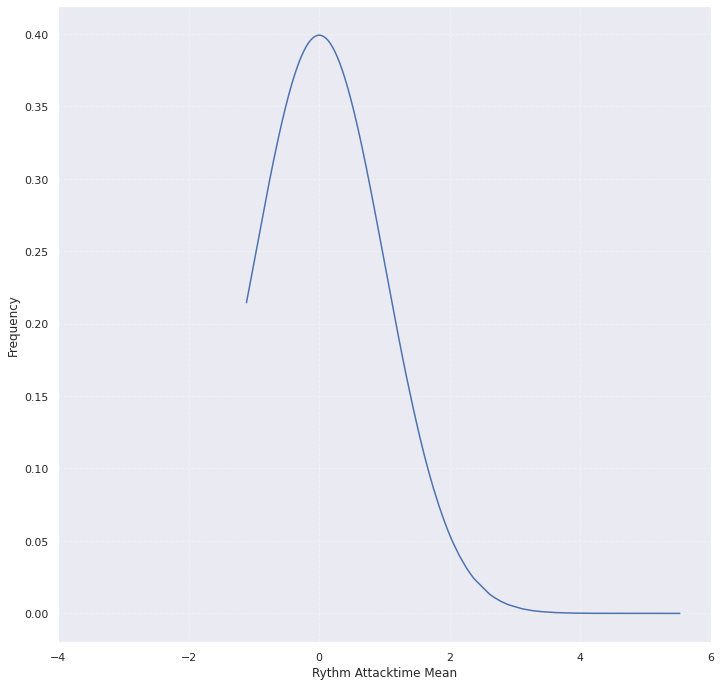

In [536]:
df_mean = np.mean(df_iadsed_normalized["rhythm_attacktime_mean"])
df_std = np.std(df_iadsed_normalized["rhythm_attacktime_mean"])

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df_iadsed_normalized["rhythm_attacktime_mean"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df_iadsed_normalized["rhythm_attacktime_mean"].sort_values(), pdf)
plt.xlim([-4, 6])  
plt.xlabel("Rythm Attacktime Mean", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

**Displaying Normal Distribution for a feature with highest variance after normalization**

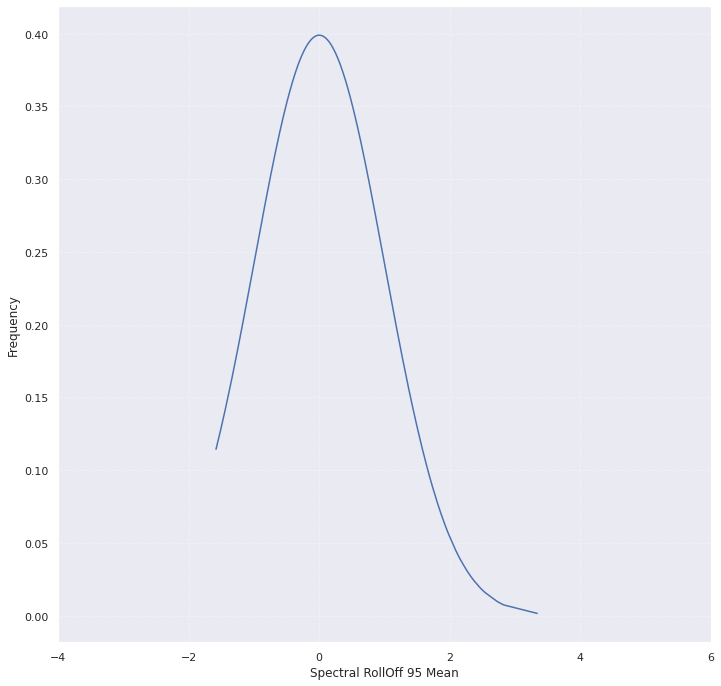

In [537]:
df_mean = np.mean(df_iadsed_normalized["spectral_rolloff95_mean"])
df_std = np.std(df_iadsed_normalized["spectral_rolloff95_mean"])

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df_iadsed_normalized["spectral_rolloff95_mean"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df_iadsed_normalized["spectral_rolloff95_mean"].sort_values(), pdf)
plt.xlim([-4, 6])  
plt.xlabel("Spectral RollOff 95 Mean", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

**Merging columns for getting final dataframe**

In [538]:
df_iadsed_final = pd.concat([df_iadsed_output.reset_index().iloc[:, 1:], df_iadsed_normalized], axis=1)
df_iadsed_final

df_iadsed_whole = pd.concat([df_iadsed_init, df_iadsed_output], axis=1)
df_iadsed_whole = df_iadsed_whole.dropna()

# **Visualizing Feature Relations**

**Correlation matrix for EmoSounds dataframe**

This is the top and bottom 5 most related features for arousal
valence                    -0.722186
spectral_spread_mean       -0.605099
spectral_centroid_std      -0.546353
spectral_flatness_mean     -0.477871
spectral_rolloff95_mean    -0.476976
                              ...   
timbre_spectralflux_std     0.545351
dynamics_rms_std            0.613270
dynamics_rms_mean           0.730638
timbre_spectralflux_mean    0.734986
arousal                     1.000000
Name: arousal, Length: 70, dtype: float64
This is the top and bottom 5 most related features for valence
arousal                    -0.722186
dynamics_rms_mean          -0.579804
timbre_spectralflux_mean   -0.576863
dynamics_rms_std           -0.502139
timbre_lowenergy_std       -0.466413
                              ...   
spectral_centroid_std       0.424218
spectral_flatness_mean      0.444086
spectral_rolloff95_mean     0.455559
spectral_spread_mean        0.509322
valence                     1.000000
Name: valence, Len

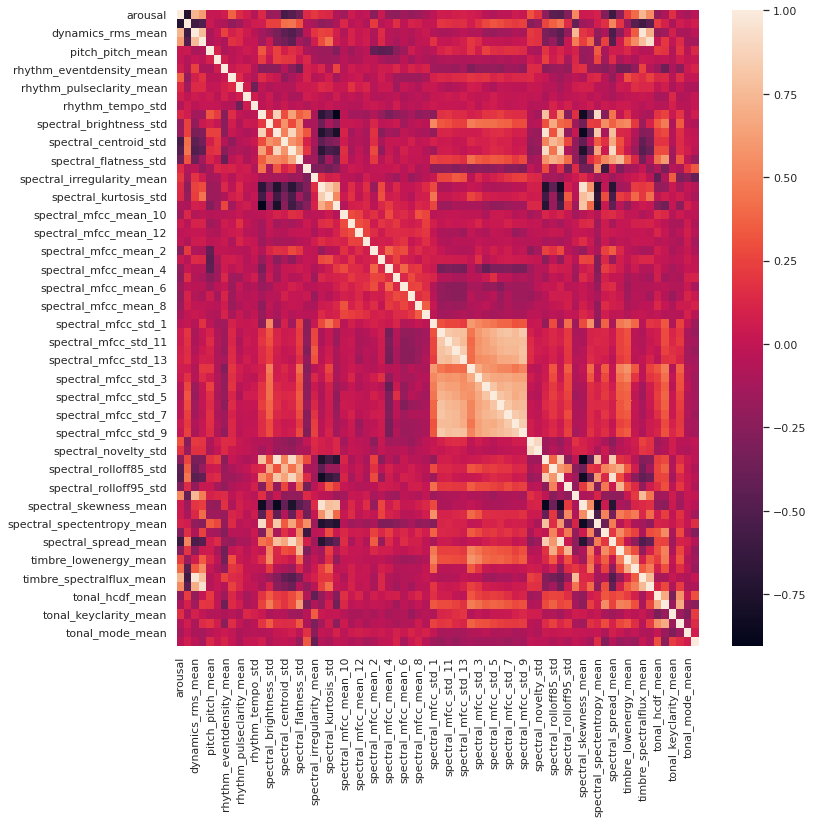

In [539]:
#Heat map of correlation for emosounds dataset
ax = sns.heatmap(df_emosounds_final.corr(), annot=False)

#Correlation matrix for Emosounds dataset
corr_mat_emosounds = df_emosounds_final.corr()

#Correlation between arousal and other features
corr_arousal_emosounds = corr_mat_emosounds.iloc[0].sort_values()
print("This is the top and bottom 5 most related features for arousal")
print(corr_arousal_emosounds)

#Correlation between valence and other features
corr_valence_emosounds = corr_mat_emosounds.iloc[1].sort_values()
print("This is the top and bottom 5 most related features for valence")
print(corr_valence_emosounds)

**Correlation matrix for IADSED dataframe**

This is the top and bottom 5 most related features for arousal
dominance                  -0.475668
valence                    -0.341381
spectral_skewness_mean     -0.308468
spectral_kurtosis_std      -0.280021
spectral_kurtosis_mean     -0.274145
                              ...   
dynamics_rms_std            0.434244
timbre_spectralflux_std     0.453653
dynamics_rms_mean           0.501143
timbre_spectralflux_mean    0.555975
arousal                     1.000000
Name: arousal, Length: 71, dtype: float64
This is the top and bottom 5 most related features for valence
dynamics_rms_std                    -0.353319
spectral_roughness_mean             -0.347238
arousal                             -0.341381
timbre_spectralflux_std             -0.334037
timbre_spectralflux_mean            -0.300033
                                       ...   
spectral_irregularity_mean           0.240145
rhythm_fluctuationmax_peakposmean    0.241104
tonal_keyclarity_mean                0.425220
dominance  

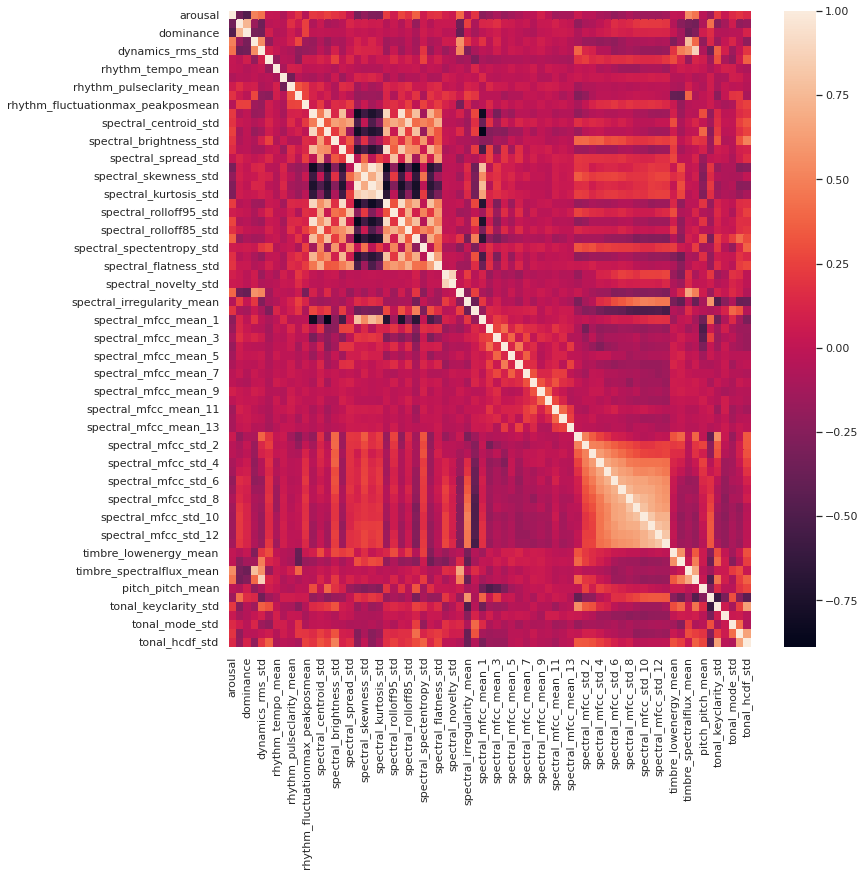

In [540]:
#Heat map of correlation for emosounds dataset
ax = sns.heatmap(df_iadsed_final.corr(), annot=False)

#Correlation matrix for Emosounds dataset
corr_mat_iadsed = df_iadsed_final.corr()

#Correlation between arousal and other features
corr_arousal_iadsed = corr_mat_iadsed.iloc[0].sort_values()
print("This is the top and bottom 5 most related features for arousal")
print(corr_arousal_iadsed)

#Correlation between valence and other features
corr_valence_iadsed = corr_mat_iadsed.iloc[1].sort_values()
print("This is the top and bottom 5 most related features for valence")
print(corr_valence_iadsed)

#Correlation between dominance and other features
corr_dominance_iadsed = corr_mat_iadsed.iloc[2].sort_values()
print("This is the top and bottom 5 most related features for dominance")
print(corr_dominance_iadsed)

# **Output**

**Loading Final EmoSounds dataframe into CSV**

In [541]:
df_emosounds = pd.concat([df_emosounds_whole.reset_index().iloc[:, :6], df_emosounds_final], axis=1).iloc[:, 1:]
df_emosounds.to_csv("EmoSoundsAfter.csv")

**Loading Final IADSED dataframe into CSV**

In [542]:
df_iadsed = pd.concat([df_iadsed_whole.reset_index().iloc[:, :6], df_iadsed_final], axis=1).iloc[:, 1:]
df_iadsed.to_csv("IADSEDAfter.csv")